# Introduction To Data Science – Assignment 1

---

### Sections A – B – C – D

---

***Instructions***

Due Date: Sunday 18th September 2022 – 11:59PM

Name the file in the format Lyyxxxx and save it as .ipynb (e.g. L201234.ipynb)

Submission will be taken on **GitHub and Google Classroom (submit the .ipynb file)** - Instructions to upload onto GitHub are provided in the link https://docs.google.com/document/d/1BR1ULOGeGWJVU6Rr6Qty1FR-quVRZyRvQGII6nEs-wo/edit?usp=sharing

After uploading and submitting the .ipynb file onto Google Classroom, also private comment the link to the GitHub repository.

All source files needed to complete this assignment can be found on the following Google Drive link https://drive.google.com/drive/folders/1VrkaVcExGWqilSeh50WZe4gUBjmUiJ9b?usp=sharing

TA Emails

Section A, C - Muhammad Maarij l192347@lhr.nu.edu.pk

Section B, D - Hira Ijaz l192377@lhr.nu.edu.pk

Happy Coding 😊

---

---
## Question 1
---

Define a procedure called "check_input" that takes an input as a square list of lists (2D Matrix of N x N) and returns a boolen "true" if the input is valid or "false" otherwise, according to the following criteria.

1. Each coloumn must contain numbers from between 1 and N, with no duplicates.
2. Each row must contain numbers from between 1 and N, with no duplicates.

In [27]:
def check_input (arr):
    for i in range(len(arr)):
      row = set() # Stores the unique values present in a row
      col = set() # Stores the unique values present in a column
      for j in range(len(arr)):
        # Checks if values are integer - if no, return False
        if not isinstance(arr[i][j], int) and not isinstance(arr[j][i], int): 
           return False
        
        # If integer, check if they already exist in set - if yes, return False else add them to set
        if arr[i][j] in row or arr[j][i] in col:
          return False
        else:
          row.add(arr[i][j])
          col.add(arr[j][i])

    return True

In [28]:
# run this block to test code after defining the procedure

test1 = [[1, 2, 3],
        [2, 3, 1],
        [3, 1, 2]]

test2 = [[1, 2, 3, 4],
        [2, 3, 1, 3],
        [3, 1, 2, 3],
        [4, 4, 4, 4]]

test3 = [['a', 'b', 'c'],
        ['b', 'c', 'a'],
        ['c', 'a', 'b']]

print(check_input(test1)) # must return true
print(check_input(test2)) # must return false
print(check_input(test3)) # must return false

True
False
False


---
## Question 2
---

**Part A** - Import the file "StudentMarkSheet.csv" as a Pandas DataFrame and print the information for the dataframe

In [29]:
import pandas as pd
student_data = pd.read_csv("StudentMarkSheet.csv" )
student_data

,Student name,Exam name,Exam date,Marks
0,James Walker,Biology,05/06/2016,31.0
1,Velma Clemons,Biology,05/06/2016,43.0
2,Kibo Underwood,Biology,05/06/2016,81.0
3,Louis Mcgee,Biology,05/06/2016,11.0
4,Phyllis Paul,Biology,05/06/2016,18.0
...,...,...,...,...
195,Yen Bowers,Sociology,21/06/2016,52.0
196,Ryan Pena,Sociology,21/06/2016,16.0
197,Portia Hamilton,Sociology,21/06/2016,34.0
198,Sydnee Chambers,Sociology,21/06/2016,76.0


**Part B** - Remove any rows that do not contain all the data. Also print the following information.

1. Number of rows before
2. Number of rows containing null data
3. Number of rows after

In [30]:
# Count of rows before removing null data 
len(student_data.index)

200

In [31]:
# Count of null rows
len(student_data[student_data.isnull().any(axis=1)])

4

In [32]:
# Remove rows that contain Nan
student_data=student_data.dropna()

In [33]:
# Count of rows after removing null data
len(student_data.index)

196

**Part C** - Print all the marks along with the subject for the student named "James Walker"

In [34]:
student_data.loc[student_data['Student name']=='James Walker', ['Exam name', 'Marks']]

,Exam name,Marks
0,Biology,31.0
42,Chemistry,61.0
71,Mathematics,23.0
150,Physics,100.0
180,Sociology,73.0


---
## Question 3
---

**Part A** - From the DataFrame created in Question 2, calculate the average marks for each subject

In [35]:
bio = student_data[student_data['Exam name'] =='Biology']['Marks'].mean()
chem = student_data[student_data['Exam name'] =='Chemistry']['Marks'].mean()
maths = student_data[student_data['Exam name'] =='Mathematics']['Marks'].mean()
phil =  student_data[student_data['Exam name'] =='Philosophy']['Marks'].mean()
phy = student_data[student_data['Exam name'] =='Physics']['Marks'].mean()
sociology = student_data[student_data['Exam name'] =='Sociology']['Marks'].mean()
print("Biology average: ", bio)
print("Chemistry average: ", chem)
print("Maths average: ", maths)
print("Philosphy average: ", phil)
print("Physics average: ", phy)
print("Sociology average: ", sociology)


Biology average:  47.89473684210526
Chemistry average:  50.57692307692308
Maths average:  48.97222222222222
Philosphy average:  47.270270270270274
Physics average:  51.76190476190476
Sociology average:  56.026315789473685


**Part B** - Using the averages you just calculated, plot a Bar Graph showing the average marks of each subject

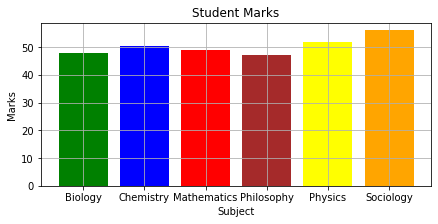

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

   
Data = {
    'Subject': ['Biology','Chemistry', 'Mathematics', 'Philosophy', 'Physics', 'Sociology'],
    'Marks': [bio, chem, maths, phil, phy, sociology]
}
student_data = pd.DataFrame(Data,columns=['Subject','Marks'])

New_Colors = ['green','blue', 'red', 'brown','yellow', 'orange']
plt.figure(figsize=(7, 3))
plt.bar(student_data['Subject'], student_data['Marks'], color=New_Colors)
plt.title('Student Marks')
plt.xlabel('Subject')
plt.ylabel('Marks')
plt.grid()
plt.show()

---
## Question 4
---

**Part A** - Import the file "CatData.csv" and preprocess it to remove any null values

In [42]:
import pandas as pd
import numpy as np
cat_data = pd.read_csv( "CatData.csv" )
cat_data=cat_data.dropna()
cat_data

,Tail Length (cm),Mass (kg)
0,18.1,3.750
1,18.6,3.800
2,19.5,3.250
3,19.3,3.450
4,19.0,3.650
...,...,...
337,20.7,4.000
338,20.2,3.400
339,19.3,3.775
340,21.0,4.100


**Part B** - Identify the independant and dependant variables (comment answer below)

In [43]:
# dependant variable: Mass
# independant variable: Tail Length

**Part C** - Create a linear regression model using sklearn and fit it to the data you just imported


In [44]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
# Reshaping since 1D array
tail = np.array(cat_data['Tail Length (cm)'])
tail = tail.reshape(len(tail), 1)

# Reshaping since 1D array
mass = np.array(cat_data['Mass (kg)'])
mass = mass.reshape(len(mass), 1)

# Applying Linear Regression
regr = regr.fit(tail, mass)

**Part D** - Print the values for slope and y-intercept

In [45]:
slope = regr.coef_
y_intercept = regr.intercept_

# Slope
print("Slope: ", slope)

# Intercept
print("Y_intercept: ", y_intercept)

Slope:  [[0.49685566]]
Y_intercept:  [-5.78083136]


**Part E** - Plot a scatter graph of the original data and a regression line on the same figure (example with dummy data shown below)

![](https://drive.google.com/uc?export=view&id=1o_NAsNjfx7zAh9m-UjvWB3rta6uraKdY)

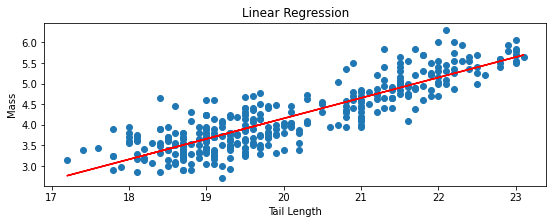

In [46]:
plt.figure(figsize=(9, 3))
plt.scatter(tail, mass)
plt.plot(tail, slope * tail + y_intercept, color='red')
plt.title('Linear Regression')
plt.xlabel('Tail Length')
plt.ylabel('Mass')
plt.show()